## 타이타닉

In [3]:
import pandas as pd

In [4]:
titanic_df = pd.read_csv("./data/titanic_train.csv")

FileNotFoundError: [Errno 2] No such file or directory: './data/titanic_train.csv'

In [ ]:
titanic_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


* PassengerId : 탑승자 데이터 일련번호
* Survived : 생존 여부
    - 0 : 사망
    - 1 : 생존
* Pclass : 티켓의 선실 등급
    - 1 : 일등석
    - 2 : 이등석
    - 3 : 삼등석
* Sex : 탑승자 성별
* Name : 탑승자 이름
* Age : 탑승자 나이
* SibSp : 같이 탑승한 형제자매 or 배우자 인원수
* Parch : 같이 탑승한 부모님 or 어린이 인원수
* Ticket : 티켓 번호
* Fare : 요금
* Cabin : 선실 번호
* Embarked : 중간 정착 항구
    - C : Cherbourg
    - Q : Queenstown
    - S : Southampton

In [ ]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### 결측치 처리

In [ ]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)

In [ ]:
titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

### 데이터 탐색

In [ ]:
titanic_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [ ]:
titanic_df['Cabin'].value_counts()

N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

In [ ]:
titanic_df['Embarked'].value_counts()

S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64

In [ ]:
titanic_df['Cabin'].apply(lambda x : x[0])

0      N
1      C
2      N
3      C
4      N
      ..
886    N
887    B
888    N
889    C
890    N
Name: Cabin, Length: 891, dtype: object

In [ ]:
titanic_df['Cabin']

0         N
1       C85
2         N
3      C123
4         N
       ... 
886       N
887     B42
888       N
889    C148
890       N
Name: Cabin, Length: 891, dtype: object

### 성별에 따른 생존 여부

In [ ]:
titanic_df[['Sex', 'Survived']]

,Sex,Survived
0,male,0
1,female,1
2,female,1
3,female,1
4,male,0
...,...,...
886,male,0
887,female,1
888,female,0
889,male,1


In [ ]:
titanic_df.groupby(['Sex']).count()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Sex,,,,,,,,,,,
female,314,314,314,314,314,314,314,314,314,314,314
male,577,577,577,577,577,577,577,577,577,577,577


In [ ]:
titanic_df.groupby(['Sex', 'Survived'])[['Survived']].count()

Survived
Sex    Survived          
female 0               81
       1              233
male   0              468
       1              109

In [ ]:
import seaborn as sns

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

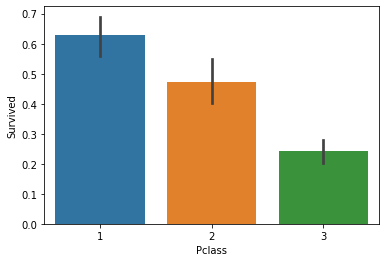

In [ ]:
sns.barplot(x = 'Pclass', y='Survived', data=titanic_df)

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

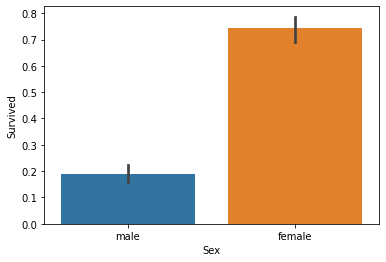

In [ ]:
sns.barplot(x='Sex', y='Survived', data=titanic_df)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

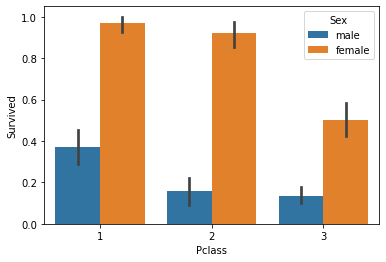

In [ ]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)

#### Age 컬럼 변경

- age <= 5 -> Baby
- age <= 12 -> Child
- age <= 18 -> Teenager
- age <= 25 -> Student
- age <= 35 -> Young Adult
- age <= 60 -> Adult
- 나머지 -> Elderly

In [ ]:
titanic_df['Age_cate'] = titanic_df['Age'].apply(lambda x : 'Baby' if x <= 5 else 
        'Child' if x <= 12 else
        'Teenage' if x <= 18 else 
        'Student' if x <= 25 else 
        'Young Adult' if x <= 35 else 
        'Adult' if x <= 60 else 'Elderly')

In [ ]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_cate
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S,Student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N,S,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Young Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,N,S,Young Adult


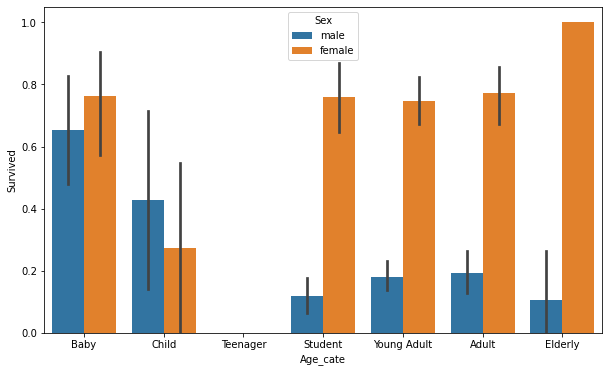

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

group_names = ['Baby', 'Child', 'Teenager', 'Student', "Young Adult", "Adult", "Elderly"]
sns.barplot(x='Age_cate', y = 'Survived', hue='Sex', data=titanic_df, order=group_names)

plt.show()

In [ ]:
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Age_cate'],
      dtype='object')

In [ ]:
titanic_df = titanic_df[['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']].copy()

In [ ]:
titanic_df['Cabin'] = titanic_df['Cabin'].str[0]

In [ ]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,N,S


### 범주형 데이터(sex, Cabin, Embarked) -> LabelEncoding 변환

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
encoder = LabelEncoder()
encoder.fit(titanic_df['Sex'])
titanic_df['Sex'] = encoder.transform(titanic_df['Sex'])

In [ ]:
encoder.classes_

array(['female', 'male'], dtype=object)

In [ ]:
encoder = LabelEncoder()
encoder.fit(titanic_df['Cabin'])
titanic_df['Cabin'] = encoder.transform(titanic_df['Cabin'])

In [ ]:
encoder.classes_

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'N', 'T'], dtype=object)

In [ ]:
encoder = LabelEncoder()
encoder.fit(titanic_df['Embarked'])
titanic_df['Embarked'] = encoder.transform(titanic_df['Embarked'])

In [ ]:
encoder.classes_

array(['C', 'N', 'Q', 'S'], dtype=object)

In [ ]:
# 코드 간편화

# for label in ['Sex', 'Cabin', 'Embarked']:
#     encoder = LabelEncoder()
#     encoder.fit(titanic_df[label])
#     titanic_df[label] = encoder.transform(titanic_df[label])

In [ ]:
titanic_df.Fare

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

#### PassengerId, Name, Ticket 삭제

In [ ]:
titanic_df.drop(['Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

In [ ]:
titanic_df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,7.2500,7,3
1,1,1,0,38.0,1,0,71.2833,2,0
2,1,3,0,26.0,0,0,7.9250,7,3
3,1,1,0,35.0,1,0,53.1000,2,3
4,0,3,1,35.0,0,0,8.0500,7,3


In [ ]:
y_titanic_df = titanic_df['Survived']
X_titianic_df = titanic_df.drop('Survived', axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_titianic_df, y_titanic_df, test_size=0.2, random_state=11)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

print(accuracy_score(y_test, lr_pred))

0.8491620111731844


c:\Users\LimDongKyu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
